In [2]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydotplus
import h5py

import theano
import tensorflow
import keras

print('scipy' + scipy.__version__)
print('numpy' + numpy.__version__)
print('matplotlib' + matplotlib.__version__)
print('pandas' + pandas.__version__)
print('sklearn' + sklearn.__version__)
print('h5py' + h5py.__version__)

print('theano' + theano.__version__)
print('tensorflow' + tensorflow.__version__)
print('keras' + keras.__version__)



scipy1.4.1
numpy1.17.5
matplotlib3.1.2
pandas0.25.3
sklearn0.22.1
h5py2.8.0
theano1.0.4
tensorflow1.15.0
keras2.2.5


Epoch 1/5
50000/50000 [==============================] - 4s 87us/step - loss: 0.7411 - acc: 0.8086
Epoch 2/5
50000/50000 [==============================] - 4s 85us/step - loss: 0.3713 - acc: 0.8985
Epoch 3/5
50000/50000 [==============================] - 4s 83us/step - loss: 0.3199 - acc: 0.9102
Epoch 4/5
50000/50000 [==============================] - 4s 81us/step - loss: 0.2903 - acc: 0.9185
Epoch 5/5
10000/10000 [==============================] - 0s 42us/step
loss_and_metrics : [0.24633672117888927, 0.9303]


NameError: ignored

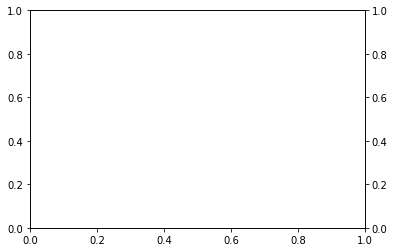

In [8]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]


X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0




Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))







%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.histort['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

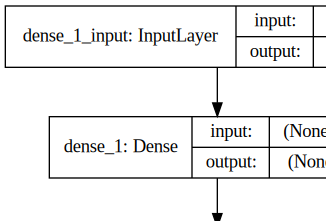

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
from keras.models import load_model
model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# 새 섹션